In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
branches = pd.read_csv('Branches_with_demographics.csv')

In [26]:
# remove reference library because it's not a normal branch
branches = branches[branches.ID != 'TRL']

# also remove North York Central??
branches = branches[branches.ID != 'NYCL']

In [4]:
# convert text columns to floats
numeric_columns = ['Programs_Cultural_2015', 'Attendance_Cultural_2015',
                   'Programs_ESL_2015', 'Attendance_ESL_2015',
                   'Program_Info_Current_Issues_2015',
                   'Attendance_Info_Current_Issues_2015',
                   'Programs_Literacy_2015', 'Attendance_Literacy_2015',
                   'Programs_Literary_2015', 'Attendance_Literary_2015',
                   'Programs_User_Ed_2015', 'Attendance_User_Ed_2015',
                   'Programs_Cultural_2014', 'Attendance_Cultural_2014',
                   'Programs_ESL_2014', 'Attendance_ESL_2014',
                   'Programs_Info_Current_Issues_2014',
                   'Attendance_Info_Current_Issues_2014',
                   'Programs_Literacy_2014', 'Attendance_Literacy_2014',
                   'Programs_Literary_2014', 'Attendance_Literary_2014',
                   'Programs_User_Ed_2014', 'Attendance_User_Ed_2014',
                   'Workstations', 'WS_Users_2015', 'WS_Users_2014',
                   'WS_Users_2013', 'visits_2015', 'visits_2014', 'visits_2013',
                   'circulation_2015', 'circulation_2014', 'circulation_2013',
                   'collection_size', 'census_population', 'NPS_population',
                   'citizens', 'non_citizens', 'recent_immigrants',
                   'visible_minority', 'non_official_languages',
                   'in_labour_force', 'employed', 'unemployed',
                   'not_in_labour_force', 'low_income']
for col in numeric_columns:
    if branches[col].dtype == 'O':
        branches[col] = branches[col].astype('float')

In [8]:
# Calculate a couple of values
branches['sessions_per_ws'] = branches['WS_Users_2015'] / \
                              branches['Workstations']
branches['pct_low_income'] = branches['low_income'] / \
                             branches['census_population']
branches['ws_use_per_visit'] = branches['WS_Users_2015'] / \
                               branches['visits_2015']
branches['pct_recent_immigrants'] = branches['recent_immigrants'] / \
                                    branches['census_population']
branches['pct_vis_minority'] = branches['visible_minority'] / \
                               branches['census_population']
branches['pct_labor_force_unemployed'] = branches['unemployed'] / \
                                         branches['in_labour_force']
branches['pct_not_in_labour_force'] = branches['not_in_labour_force'] / \
                                      branches['census_population']

<IPython.core.display.Javascript object>


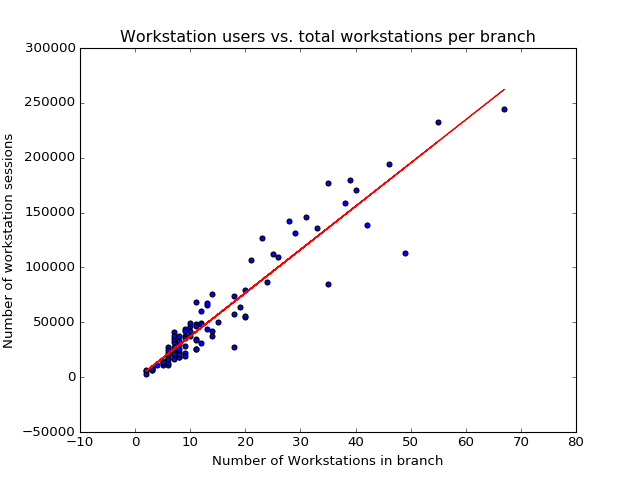

In [27]:
mod1 = LinearRegression()
mod1.fit(branches[['Workstations']], branches['WS_Users_2015'])

plt.scatter(branches['Workstations'], branches['WS_Users_2015'])
plt.title('Workstation users vs. total workstations per branch')
plt.xlabel('Number of Workstations in branch')
plt.ylabel('Number of workstation sessions')
plt.plot(branches['Workstations'], mod1.predict(branches[['Workstations']]), color='red')
plt.show()

<IPython.core.display.Javascript object>


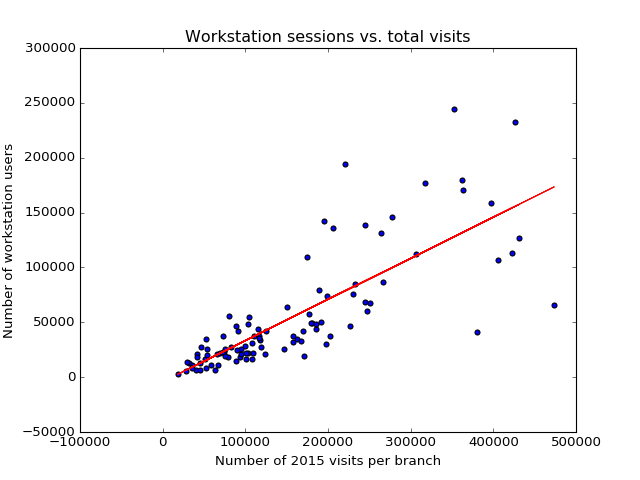

In [28]:
mod2 = LinearRegression()
mod2.fit(branches[['visits_2015']], branches['WS_Users_2015'])

plt.scatter(branches['visits_2015'], branches['WS_Users_2015'])
plt.title('Workstation sessions vs. total visits')
plt.xlabel('Number of 2015 visits per branch')
plt.ylabel('Number of workstation users')
plt.plot(branches['visits_2015'], mod2.predict(branches[['visits_2015']]), color='red')
plt.show()

<IPython.core.display.Javascript object>


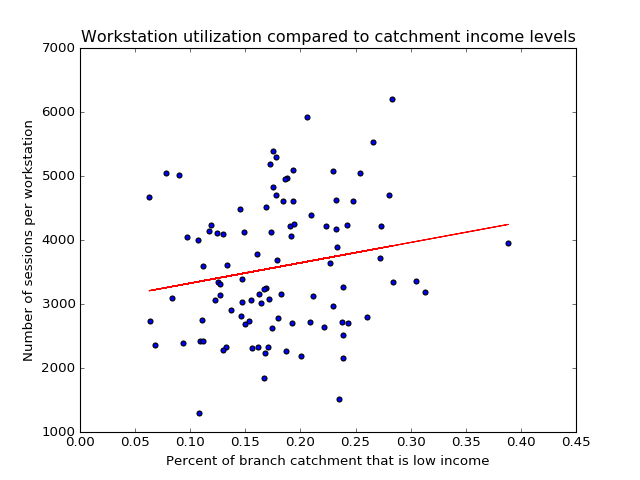

In [29]:
mod3 = LinearRegression()
mod3.fit(branches[['pct_low_income']], branches['sessions_per_ws'])

plt.scatter(branches['pct_low_income'], branches['sessions_per_ws'])
plt.title('Workstation utilization compared to catchment income levels')
plt.xlabel('Percent of branch catchment that is low income')
plt.ylabel('Number of sessions per workstation')
plt.plot(branches['pct_low_income'], mod3.predict(branches[['pct_low_income']]), color='red')
plt.show()

<IPython.core.display.Javascript object>


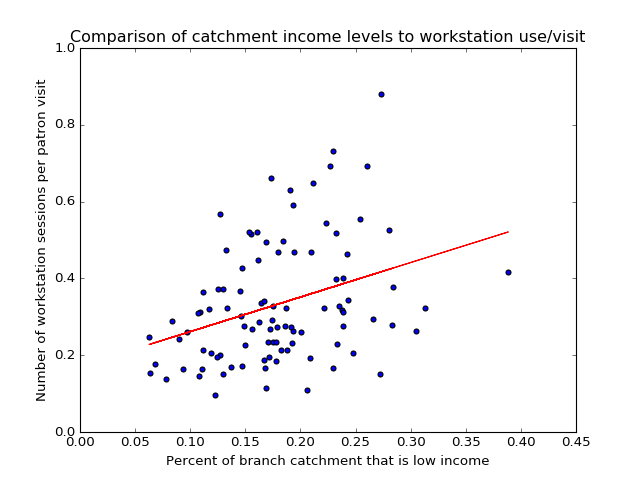

In [30]:
mod4 = LinearRegression()
mod4.fit(branches[['pct_low_income']], branches['ws_use_per_visit'])

plt.scatter(branches['pct_low_income'], branches['ws_use_per_visit'])
plt.title('Comparison of catchment income levels to workstation use/visit')
plt.xlabel('Percent of branch catchment that is low income')
plt.ylabel('Number of workstation sessions per patron visit')
plt.plot(branches['pct_low_income'], mod4.predict(branches[['pct_low_income']]), color='red')
plt.show()

<IPython.core.display.Javascript object>


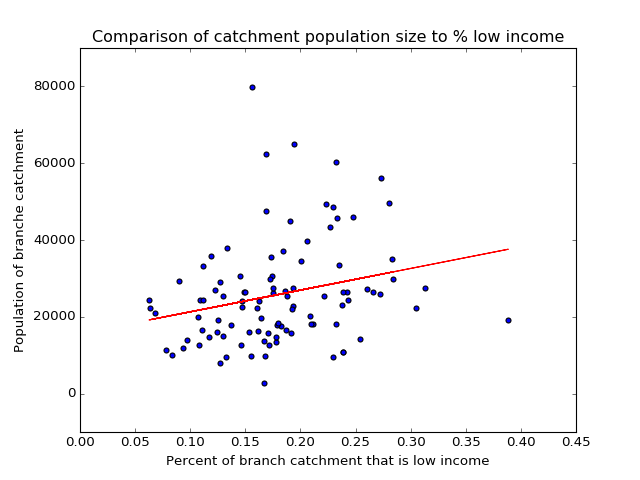

In [31]:
mod5 = LinearRegression()
mod5.fit(branches[['pct_low_income']], branches['census_population'])

plt.scatter(branches['pct_low_income'], branches['census_population'])
plt.title('Comparison of catchment population size to % low income')
plt.xlabel('Percent of branch catchment that is low income')
plt.ylabel('Population of branche catchment')
plt.plot(branches['pct_low_income'], mod5.predict(branches[['pct_low_income']]), color='red')
plt.show()

<IPython.core.display.Javascript object>


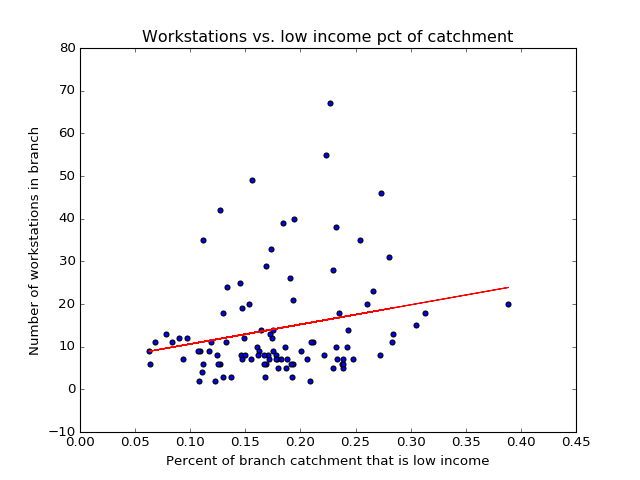

In [32]:
mod6 = LinearRegression()
mod6.fit(branches[['pct_low_income']], branches['Workstations'])

plt.scatter(branches['pct_low_income'], branches['Workstations'])
plt.title('Workstations vs. low income pct of catchment')
plt.xlabel('Percent of branch catchment that is low income')
plt.ylabel('Number of workstations in branch')
plt.plot(branches['pct_low_income'], mod6.predict(branches[['pct_low_income']]), color='red')
plt.show()

<IPython.core.display.Javascript object>


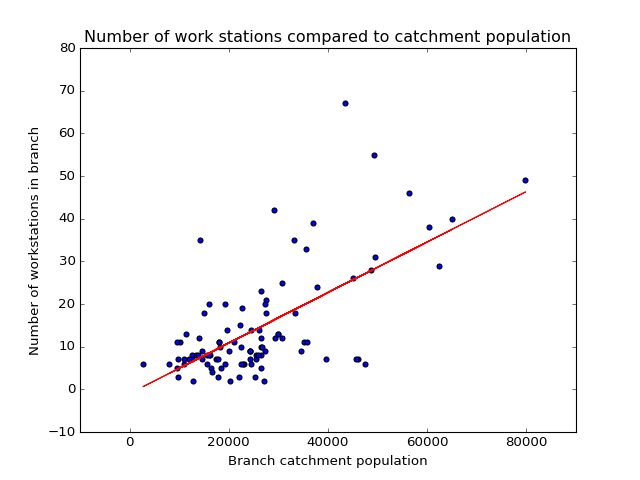

In [33]:
mod7 = LinearRegression()
mod7.fit(branches[['census_population']], branches['Workstations'])

plt.scatter(branches['census_population'], branches['Workstations'])
plt.title('Number of work stations compared to catchment population')
plt.xlabel('Branch catchment population')
plt.ylabel('Number of workstations in branch')
plt.plot(branches['census_population'], mod7.predict(branches[['census_population']]), color='red')
plt.show()